<a href="https://colab.research.google.com/github/keithferns98/ML_Models/blob/main/SVM_backpain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

df=pd.read_csv('Dataset_spine.csv')
df.head()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Class_att,Unnamed: 13
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal,NaN
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal,NaN
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal,Prediction is done by using binary classificat...
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal,NaN
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal,NaN


In [2]:
df.drop('Unnamed: 13',axis=1,inplace=True)

#Concatenate the original file with dummy variables

df=pd.concat([df,pd.get_dummies(df['Class_att'])],axis=1)

In [3]:
df.head()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Class_att,Abnormal,Normal
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal,1,0
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal,1,0
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal,1,0
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal,1,0
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal,1,0


In [4]:
df.drop(['Class_att','Normal'],axis=1,inplace=True)

In [5]:
df.head()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Abnormal
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,1


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

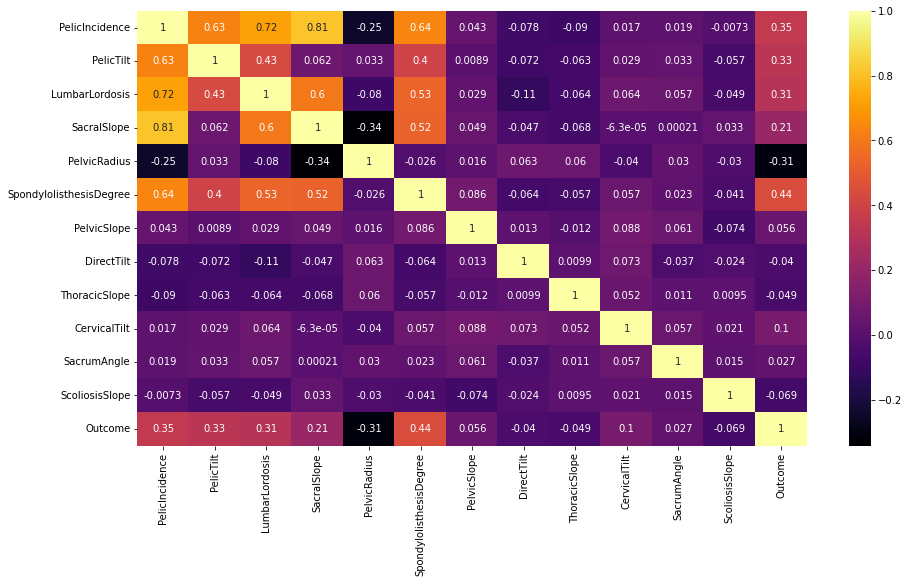

In [9]:
df.columns=['PelicIncidence','PelicTilt','LumbarLordosis','SacralSlope','PelvicRadius', 'SpondylolisthesisDegree', 'PelvicSlope', 'DirectTilt', 'ThoracicSlope', 'CervicalTilt','SacrumAngle', 'ScoliosisSlope','Outcome']
corr=df.corr()

f,ax=plt.subplots(figsize=(15,8))

sns.heatmap(corr,cmap='inferno',annot=True)


In [10]:
df.describe()

,PelicIncidence,PelicTilt,LumbarLordosis,SacralSlope,PelvicRadius,SpondylolisthesisDegree,PelvicSlope,DirectTilt,ThoracicSlope,CervicalTilt,SacrumAngle,ScoliosisSlope,Outcome
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694,0.472979,21.321526,13.064511,11.933317,-14.053139,25.645981,0.677419
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027,0.285787,8.639423,3.399713,2.893265,12.225582,10.450558,0.468220
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179,0.003220,7.027000,7.037800,7.030600,-35.287375,7.007900,0.000000
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727,0.224367,13.054400,10.417800,9.541140,-24.289522,17.189075,0.000000
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934,0.475989,21.907150,12.938450,11.953835,-14.622856,24.931950,1.000000
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352,0.704846,28.954075,15.889525,14.371810,-3.497094,33.979600,1.000000
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082,0.998827,36.743900,19.324000,16.821080,6.972071,44.341200,1.000000


In [11]:
import copy

outlier=df[['SpondylolisthesisDegree','Outcome']]
outlier

,SpondylolisthesisDegree,Outcome
0,-0.254400,1
1,4.564259,1
2,-3.530317,1
3,11.211523,1
4,7.918501,1
...,...,...
305,-4.245395,0
306,-0.421010,0
307,-2.707880,0
308,0.214750,0


In [14]:
abspond=outlier[outlier['SpondylolisthesisDegree']>15]
print("1= Abnormal, 0=Normal\n",abspond["Outcome"].value_counts())

1= Abnormal, 0=Normal
 1    146
0      3
Name: Outcome, dtype: int64


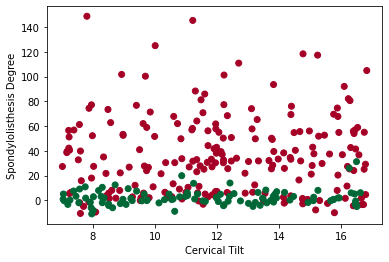

In [19]:
#Dropping Outlier

df=df.drop(115,0)
colr=copy.copy(df['Outcome'])
co=colr.map({1:0.44, 0:0.83})

#   Plot scatter
plt.scatter(df["CervicalTilt"], df["SpondylolisthesisDegree"], c=co, cmap=plt.cm.RdYlGn)
plt.xlabel("Cervical Tilt")
plt.ylabel("Spondylolisthesis Degree")

colors=['c','y','m']
ab=df['Outcome'].where(df['Outcome']==1)
np=df['Outcome'].where(df['Outcome']==0)
plt.show()

In [21]:
df.shape

(309, 13)

In [22]:
X=df.drop('Outcome',axis=1)
y=df['Outcome']

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [24]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=22,stratify=y)

In [32]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((216, 12), (93, 12), (216,), (93,))

In [33]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

clf=SVC(kernel='linear')

clf.fit(X_train,y_train)

pred=clf.predict(X_test)

score=accuracy_score(y_test,pred)
print("Support Vector Machines are ", score*100, "accurate")

Support Vector Machines are  84.94623655913979 accurate
